In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

In [2]:
DATA_FOLDER = "..\data\coged_data"

KEYFILE = "key.csv"
df_key = pd.read_csv("..\data\{}".format(KEYFILE))

In [3]:
list_of_dfs = []
for file in os.listdir(DATA_FOLDER):
    if "_egv4_summary_" in file:
        filename = os.path.join(DATA_FOLDER, file)
        list_of_dfs.append(pd.read_csv(filename, sep="\t"))

df = pd.concat(list_of_dfs)

In [4]:
def assemble_df(folder):
    list_of_dfs = []
    for file in os.listdir(folder):
        if "_egv4_summary_" in file:
            filename = os.path.join(folder, file)
            list_of_dfs.append(pd.read_csv(filename, sep="\t"))

    return pd.concat(list_of_dfs)

def tweak_coged(df, df_key):
    IDs = df_key.ID.unique()
    
    return (df
            .rename(columns={"script.subjectid": "ID",
                             "script.startdate": "date"},)
            .query("ID in @IDs")
            .sort_values(by=["ID", "date"])
           )

DATA_FOLDER = "..\data\coged_data"

KEYFILE = "key.csv"
df_key = pd.read_csv("..\data\{}".format(KEYFILE))

df = tweak_coged(assemble_df(DATA_FOLDER), df_key)

In [7]:
df["session"] = [""] * len(df)
df["nsessions"] = [""] * len(df)

for ID in df.ID.unique():
    nsessions = sum(df.ID == ID)
    df.loc[df.ID == ID, "nsessions"] = [nsessions]*nsessions
    
    if nsessions == 3:
        df.loc[df.ID == ID, "session"] = ["T1", "T2", "T3"]

df = df[df.nsessions == 3]


In [8]:
print("There are {} unique IDs in the dataframe".format(len(df.ID.unique())))

There are 40 unique IDs in the dataframe


In [9]:
df.columns

Index(['date', 'script.starttime', 'ID', 'script.groupid',
       'script.elapsedtime', 'computer.platform', 'values.completed',
       'values.IP12', 'values.IP13', 'values.IP14', 'values.IP15',
       'values.IP16', 'values.winAmount12', 'values.winAmount13',
       'values.winAmount14', 'values.winAmount15', 'values.winAmount16',
       'values.winAmountTotal', 'values.hitrate_N2', 'values.zh_N2',
       'values.FArate_N2', 'values.zFA_N2', 'values.dprime_N2',
       'values.hitrate_N3', 'values.zh_N3', 'values.FArate_N3',
       'values.zFA_N3', 'values.dprime_N3', 'values.hitrate_N4',
       'values.zh_N4', 'values.FArate_N4', 'values.zFA_N4', 'values.dprime_N4',
       'values.hitrate_N5', 'values.zh_N5', 'values.FArate_N5',
       'values.zFA_N5', 'values.dprime_N5', 'values.hitrate_N6',
       'values.zh_N6', 'values.FArate_N6', 'values.zFA_N6', 'values.dprime_N6',
       'session', 'nsessions'],
      dtype='object')

In [10]:
df.head()

,date,script.starttime,ID,script.groupid,script.elapsedtime,computer.platform,values.completed,values.IP12,values.IP13,values.IP14,...,values.FArate_N5,values.zFA_N5,values.dprime_N5,values.hitrate_N6,values.zh_N6,values.FArate_N6,values.zFA_N6,values.dprime_N6,session,nsessions
0,30823,09:37:32,2018,300486209,3807174,win,1,0,1.984375,1.984375,...,0.000000,-6.000000,5.032578,0.125000,-1.150349,0.000000,-6.000000,4.849651,T1,3
0,31523,09:34:08,2018,975206461,3672582,win,1,0,1.984375,1.984375,...,0.000000,-6.000000,5.061186,0.166667,-0.967422,0.000000,-6.000000,5.032578,T2,3
0,32223,09:32:37,2018,900747467,3592422,win,1,0,1.984375,1.984375,...,0.000000,-6.000000,4.268336,0.238095,-0.712443,0.000000,-6.000000,5.287557,T3,3
0,30823,11:11:32,2063,507084292,4129542,win,1,0,1.796875,1.390625,...,0.108696,-1.233495,1.069284,0.521739,0.054519,0.108696,-1.233495,1.288013,T1,3
0,31623,11:09:58,2063,558877326,3920315,win,1,0,1.953125,1.984375,...,0.108696,-1.233495,1.069284,0.545455,0.114185,0.063830,-1.523396,1.637582,T2,3


In [11]:
# get just dprimes
df.rename(columns={"values.dprime_N2": "N2",
                   "values.dprime_N3": "N3",
                   "values.dprime_N4": "N4",
                   "values.dprime_N5": "N5",
                   "values.dprime_N6": "N6",}, inplace=True)

cols = ["ID", "session", "N2", "N3", "N4", "N5", "N6"]

df_dprime = df[cols]

In [12]:
df_dprime

,ID,session,N2,N3,N4,N5,N6
0,2018,T1,-4.534766,4.779360,4.849651,5.032578,4.849651
0,2018,T2,6.430727,5.195404,5.032578,5.061186,5.032578
0,2018,T3,5.032578,4.747880,4.903196,4.268336,5.287557
0,2063,T1,7.067571,2.571572,1.558057,1.069284,1.288013
0,2063,T2,7.067571,2.962837,2.172309,1.069284,1.637582
...,...,...,...,...,...,...,...
0,8042,T2,7.067571,1.020183,1.248451,1.515535,0.621137
0,8042,T3,6.967422,1.636788,0.676147,0.388070,0.744734
0,8049,T1,6.180012,1.280357,0.547618,0.788769,0.345318
0,8049,T2,7.465234,1.052918,0.902001,1.174641,1.069284


In [13]:
# reformats key.csv so it can be merged with qualtrics data
df_key_long = pd.wide_to_long(df_key, "T", i="ID", j="session")
df_key_long.reset_index(inplace=True)
df_key_long["session"] = ["T{}".format(s) for s in df_key_long.session]
df_key_long.rename(columns={"T": "condition"}, inplace=True)

In [14]:
# adds column for condition (e.g. CS, DCS etc) by merging two dfs
df_dprime = df_dprime.merge(df_key_long, on=["ID", "session"])

In [15]:
# saves to csv, may need to reformat for JASP
df_dprime.to_csv(os.path.join("..//data", "dprime.csv"))
df_dprime

,ID,session,N2,N3,N4,N5,N6,condition
0,2018,T2,6.430727,5.195404,5.032578,5.061186,5.032578,DCS
1,2018,T3,5.032578,4.747880,4.903196,4.268336,5.287557,CS
2,2063,T2,7.067571,2.962837,2.172309,1.069284,1.637582,CS
3,2063,T3,12.000000,3.225767,2.102872,1.378419,1.320479,DCXS
4,2072,T2,1.563007,2.015533,1.785261,1.566909,1.021465,CXS
...,...,...,...,...,...,...,...,...
75,8035,T3,12.000000,12.000000,6.938814,3.363247,1.305219,CXS
76,8042,T2,7.067571,1.020183,1.248451,1.515535,0.621137,CS
77,8042,T3,6.967422,1.636788,0.676147,0.388070,0.744734,DCS
78,8049,T2,7.465234,1.052918,0.902001,1.174641,1.069284,CS


In [16]:
conditions = ["CS", "DCS"]
df_dcs = pd.pivot(df_dprime.query("condition in @conditions"), index="ID", columns=["condition"], values=["N2", "N3", "N4", "N5", "N6"])

In [17]:
df_dcs.dropna()

N2                   N3                  N4            \
condition         CS        DCS        CS       DCS        CS       DCS   
ID                                                                        
2018        5.032578   6.430727  4.747880  5.195404  4.903196  5.032578   
4025        7.067571   2.450565  0.618479  0.525648  0.731356  0.894748   
4035        6.967422   6.565949  1.140635  1.064629  0.525487  2.000404   
4050        7.382994   6.565949  2.525742  1.746322  2.423742  1.278388   
6024        1.563007   7.382994  0.965447  0.892436 -0.364746 -0.273411   
7024       12.000000  12.000000  3.207955  3.225767  2.313304  2.014528   
7048       12.000000  12.000000  3.207955  2.888307  2.279978  2.468508   
8014        7.067571   6.967422  7.644854  1.588158  1.745431  2.070552   
8042        7.067571   6.967422  1.020183  1.636788  1.248451  0.676147   

                 N5                  N6            
condition        CS       DCS        CS       DCS  
ID                                                 
2018       4.268336  5.061186  5.287557  5.032578  
4025       2.558397  0.278210  0.626881  0.859525  
4035       0.561582  0.819234  0.505113  0.907640  
4050       1.271819  1.579206  1.813721  1.250537  
6024       0.844941  0.828374  0.133729  0.715137  
7024       2.024326  2.775928  2.000404  2.249810  
7048       2.153056  2.315050  2.140771  0.993333  
8014       2.000404  2.513506  0.897240  1.657156  
8042       1.515535  0.388070  0.621137  0.744734

In [18]:
df_dprime.query("session == 'T2'").N2.values

array([ 6.43072727,  7.06757051,  1.56300652, 11.99999991,  6.96742156,
       11.99999991, 11.99999991, 11.99999991, 11.99999991, 11.99999991,
        2.39349845,  2.45056468,  6.96742156,  6.56594878, 11.99999991,
        7.38299409, 11.99999991, 11.99999991, 11.99999991, 11.99999991,
        6.96742156,  7.4260768 ,  1.56300652,  7.4260768 ,  1.94894296,
        6.56594878,  0.45865524, 11.99999991,  7.38299409, 11.99999991,
       11.99999991,  7.38299409, 11.99999991,  7.4260768 , 11.99999991,
        6.96742156, 11.99999991, 11.99999991,  7.06757051,  7.46523374])

N2 Ttest_indResult(statistic=0.6426413216638146, pvalue=0.5233355792299819)
N3 Ttest_indResult(statistic=-1.0062958856106792, pvalue=0.3190239843648183)
N4 Ttest_indResult(statistic=-0.7112786369536309, pvalue=0.48015229398237536)
N5 Ttest_indResult(statistic=-0.5755197111237775, pvalue=0.5674706665902869)
N6 Ttest_indResult(statistic=-0.23929195810022957, pvalue=0.8118382688401343)


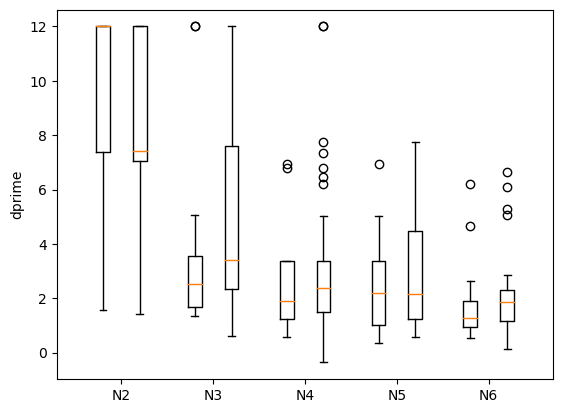

In [32]:
spacing=0.2
nback_levels = ["N2", "N3", "N4", "N5", "N6"]
f, ax = plt.subplots()

for idx, col in enumerate(nback_levels):
    
    dcs = df_dprime.query("condition == 'CXS'")[col].values
    cs = df_dprime.query("condition == 'CS'")[col].values
    
    ax.boxplot(dcs, positions=[idx-spacing])
    ax.boxplot(cs, positions=[idx+spacing])
    
    print(col, ttest_ind(dcs, cs))
    
ax.set_ylabel("dprime")
ax.set_xticks(range(5))
ax.set_xticklabels(nback_levels);

In [20]:
# get just IPs
df.rename(columns={"values.IP12": "IP12",
                   "values.IP13": "IP13",
                   "values.IP14": "IP14",
                   "values.IP15": "IP15",
                   "values.IP16": "IP16",}, inplace=True)

cols = ["ID", "session", "IP13", "IP14", "IP15", "IP16"]

df_ip = df[cols]

In [21]:
# adds column for condition (e.g. CS, DCS etc) by merging two dfs
df_ip = df_ip.merge(df_key_long, on=["ID", "session"])

In [22]:
df_ip.to_csv(os.path.join("..//data", "ip.csv"))

conditions = ["CS", "DCS"]
df_dcs = pd.pivot(df_ip.query("condition in @conditions"), index="ID", columns=["condition"], values=["IP13", "IP14", "IP15", "IP16"]).dropna()

In [23]:
df_dcs.to_csv(os.path.join("..//data", "ip_dcs.csv"))

IP13 Ttest_indResult(statistic=-0.9472307260720181, pvalue=0.3479879833117202)
IP14 Ttest_indResult(statistic=-0.6726238686729676, pvalue=0.504222917420517)
IP15 Ttest_indResult(statistic=-0.9192653221603853, pvalue=0.3622843603534882)
IP16 Ttest_indResult(statistic=0.5319496691509217, pvalue=0.5970706377349368)


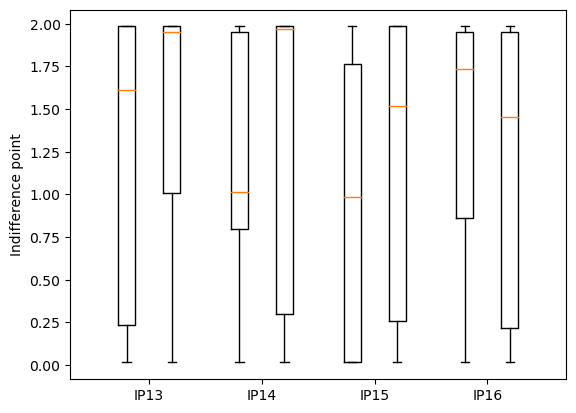

In [30]:
spacing=0.2
nback_levels = ["IP13", "IP14", "IP15", "IP16"]
f, ax = plt.subplots()

for idx, col in enumerate(nback_levels):
    
    dcs = df_ip.query("condition == 'CXS'")[col].values
    cs = df_ip.query("condition == 'CS'")[col].values
    
    ax.boxplot(dcs, positions=[idx-spacing])
    ax.boxplot(cs, positions=[idx+spacing])
    
    print(col, ttest_ind(dcs, cs))
    
ax.set_ylabel("Indifference point")
ax.set_xticks(range(4))
ax.set_xticklabels(nback_levels);

In [25]:
df

,date,script.starttime,ID,script.groupid,script.elapsedtime,computer.platform,values.completed,IP12,IP13,IP14,...,values.FArate_N5,values.zFA_N5,N5,values.hitrate_N6,values.zh_N6,values.FArate_N6,values.zFA_N6,N6,session,nsessions
0,30823,09:37:32,2018,300486209,3807174,win,1,0,1.984375,1.984375,...,0.000000,-6.000000,5.032578,0.125000,-1.150349,0.000000,-6.000000,4.849651,T1,3
0,31523,09:34:08,2018,975206461,3672582,win,1,0,1.984375,1.984375,...,0.000000,-6.000000,5.061186,0.166667,-0.967422,0.000000,-6.000000,5.032578,T2,3
0,32223,09:32:37,2018,900747467,3592422,win,1,0,1.984375,1.984375,...,0.000000,-6.000000,4.268336,0.238095,-0.712443,0.000000,-6.000000,5.287557,T3,3
0,30823,11:11:32,2063,507084292,4129542,win,1,0,1.796875,1.390625,...,0.108696,-1.233495,1.069284,0.521739,0.054519,0.108696,-1.233495,1.288013,T1,3
0,31623,11:09:58,2063,558877326,3920315,win,1,0,1.953125,1.984375,...,0.108696,-1.233495,1.069284,0.545455,0.114185,0.063830,-1.523396,1.637582,T2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,31423,11:07:22,8042,231164294,3577039,win,1,0,0.015625,0.015625,...,0.347826,-0.391196,1.515535,0.695652,0.511936,0.456522,-0.109200,0.621137,T2,3
0,32123,09:33:21,8042,695395245,3505169,win,1,0,0.015625,1.234375,...,0.311111,-0.492703,0.388070,0.708333,0.548522,0.422222,-0.196212,0.744734,T3,3
0,30723,11:12:30,8049,941827930,3899194,win,1,0,0.515625,0.390625,...,0.127660,-1.137524,0.788769,0.304348,-0.511936,0.195652,-0.857254,0.345318,T1,3
0,31523,09:42:07,8049,34963207,3710271,win,1,0,0.453125,0.015625,...,0.063830,-1.523396,1.174641,0.434783,-0.164211,0.108696,-1.233495,1.069284,T2,3


In [26]:
# get just IPs
df.rename(columns={"values.winAmount13": "win13",
                   "values.winAmount14": "win14",
                   "values.winAmount15": "win15",
                   "values.winAmount16": "win16",}, inplace=True)

cols = ["ID", "session", "win13", "win14", "win15", "win16"]

df_win = df[cols]

In [27]:
# adds column for condition (e.g. CS, DCS etc) by merging two dfs
df_win = df_win.merge(df_key_long, on=["ID", "session"])

In [28]:
# saves to CSV
df_win.to_csv(os.path.join("..//data", "win.csv"))

win13 Ttest_indResult(statistic=-0.36632367578431085, pvalue=0.7156389104641063)
win14 Ttest_indResult(statistic=-0.6330887572849093, pvalue=0.5295044304041475)
win15 Ttest_indResult(statistic=-0.221250104177408, pvalue=0.8257811637949586)
win16 Ttest_indResult(statistic=1.4243088643071935, pvalue=0.16044746168962515)


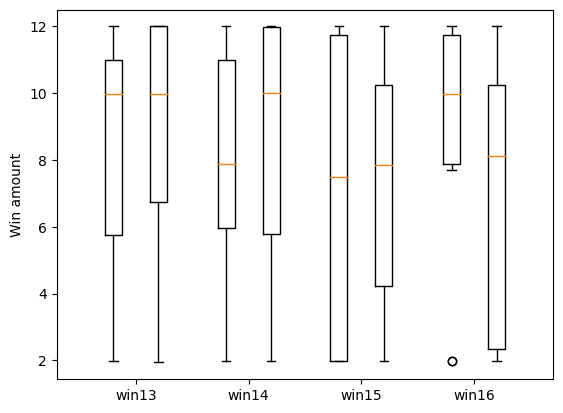

In [31]:
spacing=0.2
nback_levels = ["win13", "win14", "win15", "win16"]
f, ax = plt.subplots()

for idx, col in enumerate(nback_levels):
    
    dcs = df_win.query("condition == 'CXS'")[col].values
    cs = df_win.query("condition == 'CS'")[col].values
    
    ax.boxplot(dcs, positions=[idx-spacing])
    ax.boxplot(cs, positions=[idx+spacing])
    
    print(col, ttest_ind(dcs, cs))
    
ax.set_ylabel("Win amount")
ax.set_xticks(range(4))
ax.set_xticklabels(nback_levels);